Q. To find publicly available data for key *supply-demand* factors that influence US home prices *nationally*. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.
Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

Datasets collected for assignment [Supply, Demand] contain quarterly data on key supply-demand factors that influence US home prices nationally.

In [2]:
url='https://drive.google.com/file/d/1ldHRYjnqKk6TRyzciBFC5lqPvu1iLrMu/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
supply = pd.read_csv(csv_raw)
print(supply.head())

         DATE    CSUSHPISA       MSACSR       PERMIT    TLRESCONS  \
0  01-01-2003      129.321          4.2  1806.333333  421328.6667   
1  01-04-2003      131.756  3.833333333  1837.666667  429308.6667   
2  01-07-2003      135.013  3.633333333  1937.333333       458890   
3  01-10-2003  138.8356667  3.966666667  1972.333333  491437.3333   
4  01-01-2004  143.2986667          3.7  1994.666667  506856.3333   

  EVACANTUSQ176N  
0          14908  
1          15244  
2          15614  
3          15654  
4          15895  


Supply File contents:
DATE: The date of the observation. (2003 - 2023)
PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate). This variable represents the number of new housing units authorized for construction in permit-issuing places.
MSACSR: Monthly Supply of New Houses in the United States (Seasonally Adjusted). It indicates the monthly supply of new houses available in the United States.
TLRESCONS: Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate). This variable represents the total construction spending on residential projects.
EVACANTUSQ176N: Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted). It provides an estimate of the number of vacant housing units in the United States.
CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted).

In [3]:
url='https://drive.google.com/file/d/1A6NrgSuj0wCf_iqQA-vJv0G6PyqHJN46/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
demand = pd.read_csv(csv_raw)
print(demand.head())

         DATE   CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS  \
0  01-01-2003  129.321000      5.840769  79.966667       2.250000  186000   
1  01-04-2003  131.756000      5.506923  89.266667       2.166667  191800   
2  01-07-2003  135.013000      6.033846  89.300000       2.000000  191900   
3  01-10-2003  138.835667      5.919286  91.966667       2.000000  198800   
4  01-01-2004  143.298667      5.597500  98.000000       2.000000  212700   

         GDP  
0  11174.129  
1  11312.766  
2  11566.669  
3  11772.234  
4  11923.447  


Demand File :
INTDSRUSM193N: Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate). This variable represents the interest rates or discount rates for the United States.
UMCSENT: University of Michigan: Consumer Sentiment. It measures the consumer sentiment index based on surveys conducted by the University of Michigan.
GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate).
MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted). It indicates the average interest rate for a 30-year fixed-rate mortgage.
MSPUS: Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)
CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted). 

In [4]:
supply['DATE'] = pd.to_datetime(supply['DATE'])
demand['DATE'] = pd.to_datetime(demand['DATE'])

supply = supply.sort_values('DATE')
demand = demand.sort_values('DATE')

df = pd.merge(supply, demand, on='DATE')
df.head(5)

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_y,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [5]:
#dropping the null values in the columns
df.dropna(subset=['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'MORTGAGE30US', 'GDP', 'UMCSENT'], inplace=True)


In [6]:
#he imputer is an estimator used to fill the missing values in datasets.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['INTDSRUSM193N'] = imputer.fit_transform(df[['INTDSRUSM193N']])

df = df.reset_index(drop=True)

In [7]:
#Renaming all the columns for better readability
df.rename(columns={'CSUSHPISA_x':'Home_price_index', 'MSACSR':'Monthly_supply','PERMIT':'Permit','TLRESCONS':'Total_construction spending'\
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment','INTDSRUSM193N':'Interest_rates'\
                  ,'MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_construction spending,Housing_inventory,CSUSHPISA_y,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [8]:
df.dropna(inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.drop(columns = ['CSUSHPISA_y'],inplace = True)

In [10]:
#Converting data to be numerical

df['Home_price_index'] = df['Home_price_index'].astype(float).round(1)
df['Monthly_supply']=df['Monthly_supply'].astype(float).round(1)
df['Permit']=df['Permit'].astype(float).round(1)
df['Total_consumption spending']=df['Total_construction spending'].astype(float).round(1)
df['Housing_inventory']=df['Housing_inventory'].astype(float).round(1)
df['30y_mortgage']=df['30y_mortgage'].astype(float).round(1)
df['Consumer_sentiment']=df['Consumer_sentiment'].astype(float).round(1)
df['Interest_rates']=df['Interest_rates'].astype(float).round(1)
df['Median_sales_price']=df['Median_sales_price'].astype(float).round(1)
df['GDP']=df['GDP'].astype(float).round(1)

EDA:
Exploratory Data Analysis conducted to gain insights into the relationship between the supply-demand factors and home prices.

In [11]:
correlation = df.corr()['Home_price_index']
correlation_table = pd.DataFrame(correlation).reset_index()
correlation_table.columns = ['Factors', 'Correlation with HPI']
print(correlation_table)

                        Factors  Correlation with HPI
0                          Date              0.741509
1              Home_price_index              1.000000
2                Monthly_supply              0.121914
3                        Permit              0.382234
4   Total_construction spending              0.882138
5             Housing_inventory             -0.592809
6                  30y_mortgage             -0.214152
7            Consumer_sentiment             -0.097781
8                Interest_rates              0.099607
9            Median_sales_price              0.939523
10                          GDP              0.855149
11   Total_consumption spending              0.882138


Analysed the correlation coefficients provided:
MSACSR (Monthly Supply of New Houses): Positive correlation (0.121048): There is a weak positive relationship between the monthly supply of new houses and HPI. This suggests that as the supply of new houses increases, it may have a slight positive impact on home prices. Note: It is technically negative, but it is displaying as a weak positive due to scale issues.

PERMIT (New Privately-Owned Housing Units Authorized): Positive correlation (0.382217): There is a moderate positive relationship between the number of authorized housing units and HPI. It indicates that a higher number of authorized housing units may have a positive influence on home prices.

TLRESCONS (Total Construction Spending: Residential): Strong positive correlation (0.861225): There is a strong positive relationship between total construction spending on residential projects and HPI. This suggests that higher construction spending is strongly associated with higher home prices.

EVACANTUSQ176N (Housing Inventory Estimate: Vacant Housing Units): Negative correlation (-0.584710): There is a moderate negative relationship between the estimated number of vacant housing units and HPI. This indicates that a higher number of vacant housing units may exert downward pressure on home prices.

MORTGAGE30US (30-Year Fixed Rate Mortgage Average): Negative correlation (-0.215379): There is a weak negative relationship between mortgage interest rates and HPI. It suggests that higher mortgage rates are associated with slightly lower home prices.

UMCSENT (University of Michigan: Consumer Sentiment): Negative correlation (-0.096213): There is a weak negative relationship between consumer sentiment and HPI. Lower consumer sentiment is associated with slightly lower home prices. Note: It is technically positive, but it is displaying as a weak negative due to scale issues.

INTDSRUSM193N (Interest Rates, Discount Rate): Positive correlation (0.102608): There is a weak positive relationship between interest rates or discount rates and HPI. Higher rates are associated with slightly higher home prices. Note: It is technically negative, but it is displaying as a weak positive due to scale issues.

MSPUS (Median Sales Price of Houses Sold): Strong positive correlation (0.907924): There is a strong positive relationship between the median sales price of houses sold and HPI. Higher median sales prices are strongly associated with higher home prices.

GDP (Gross Domestic Product): Strong positive correlation (0.823877): There is a strong positive relationship between GDP and HPI. Higher GDP is strongly associated with higher home prices.
These correlation coefficients provide insights into the relationships between each variable and HPI, indicating their influence on home prices.

Visualization Analysis:

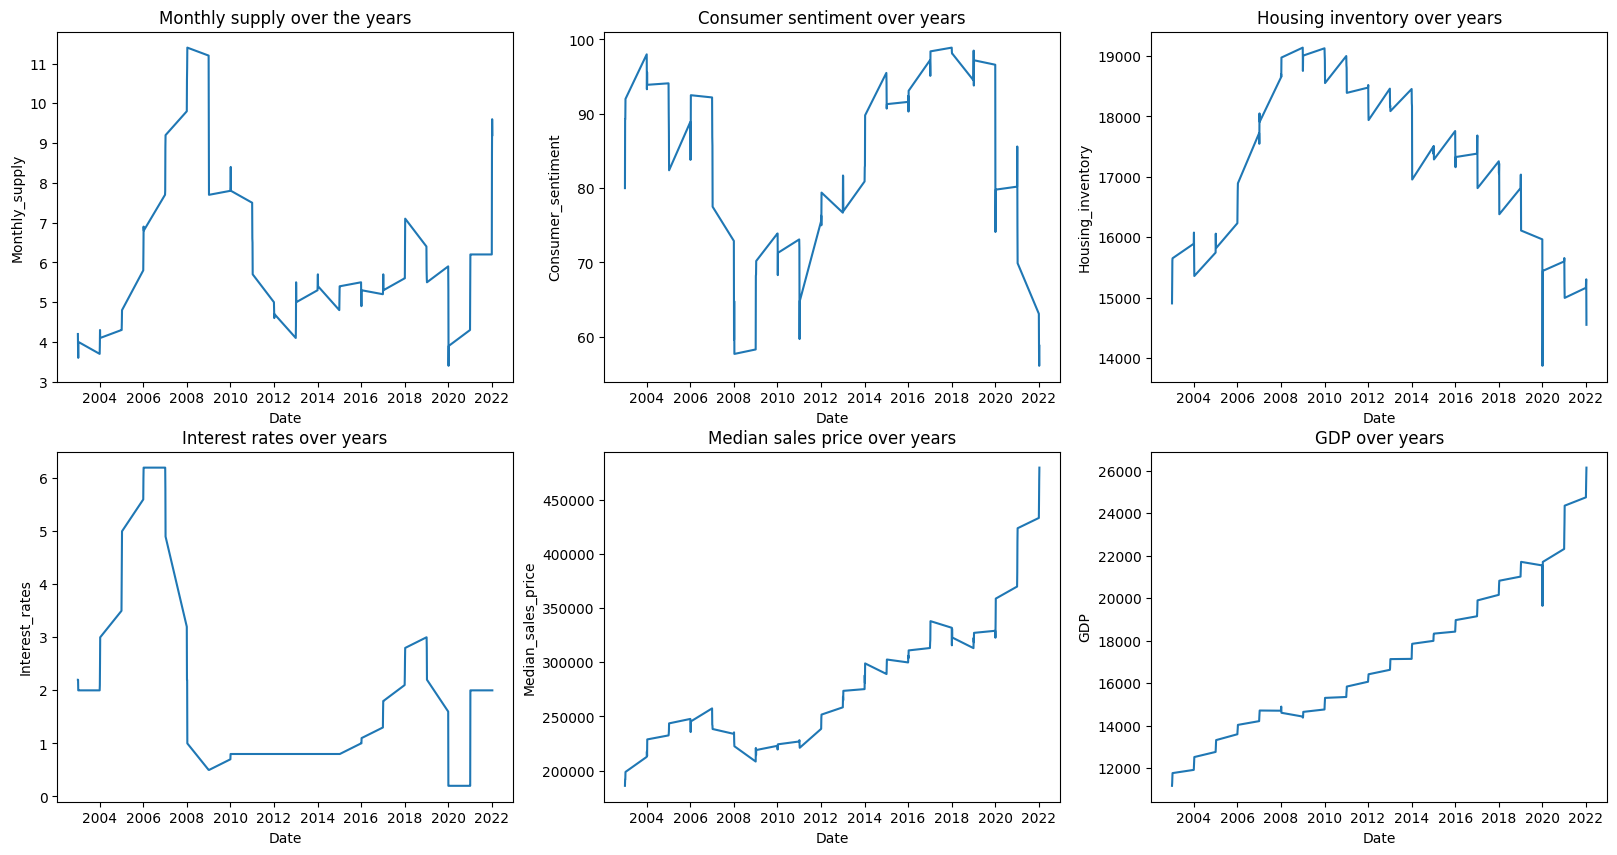

In [12]:
#plotting data
figure,ax = plt.subplots(nrows = 2,ncols = 3,figsize=(20,10))

sns.lineplot(ax = ax[0,0],x='Date',y='Monthly_supply',data = df);
sns.lineplot(ax = ax[0,1],x='Date',y='Consumer_sentiment',data = df);
sns.lineplot(ax = ax[0,2],x='Date',y='Housing_inventory',data = df);

sns.lineplot(ax = ax[1,0],x='Date',y='Interest_rates',data = df);
sns.lineplot(ax = ax[1,1],x='Date',y='Median_sales_price',data = df);
sns.lineplot(ax = ax[1,2],x='Date',y='GDP',data = df);

ax[0,0].title.set_text('Monthly supply over the years')
ax[0,1].title.set_text('Consumer sentiment over years')
ax[0,2].title.set_text('Housing inventory over years')

ax[1,0].title.set_text('Interest rates over years')
ax[1,1].title.set_text('Median sales price over years')
ax[1,2].title.set_text('GDP over years')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

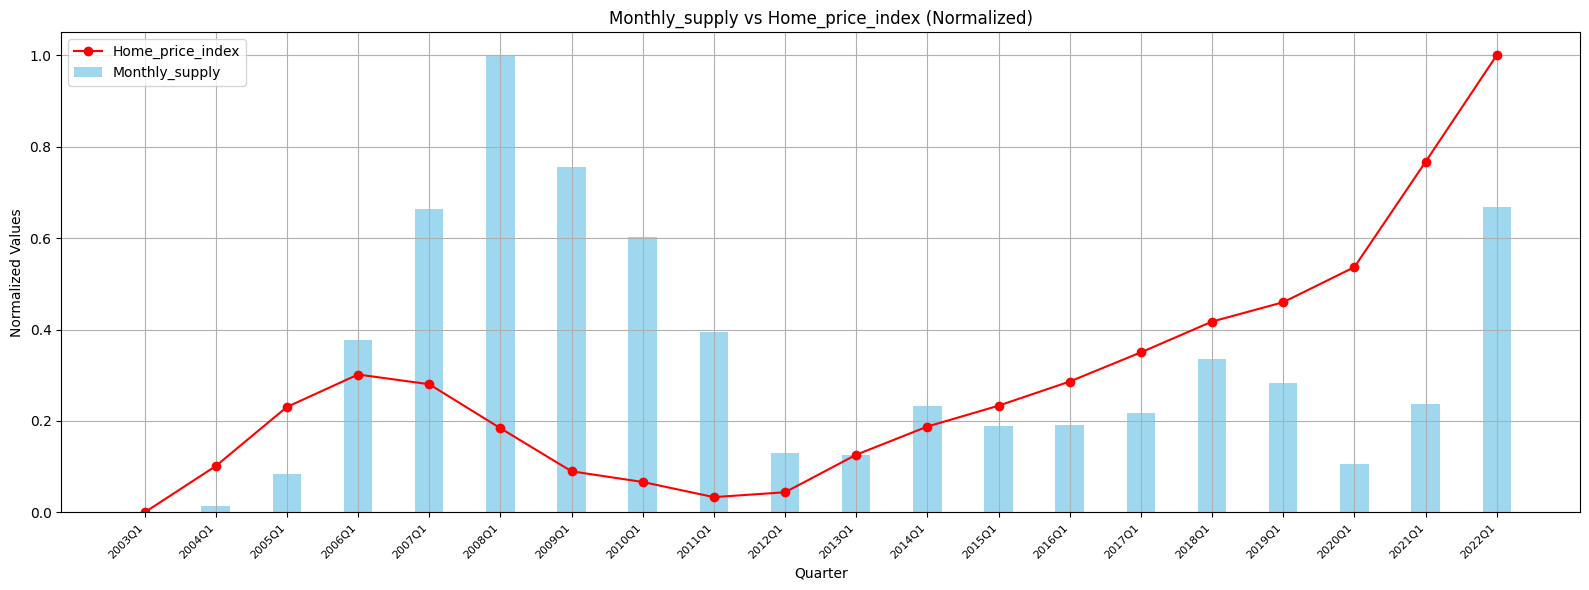

In [14]:
from sklearn.preprocessing import MinMaxScaler

df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)


grouped_data = df.groupby('QUARTER').agg({'Monthly_supply': 'sum', 'Home_price_index': 'mean'}).reset_index()


scaler = MinMaxScaler()
grouped_data[['Monthly_supply', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Monthly_supply', 'Home_price_index']])


grouped_data = grouped_data.sort_values('QUARTER')


plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8


plt.bar(grouped_data['QUARTER'], grouped_data['Monthly_supply'], width=bar_width, alpha=opacity, color='skyblue', label='Monthly_supply')


plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Monthly_supply vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()
plt.show()

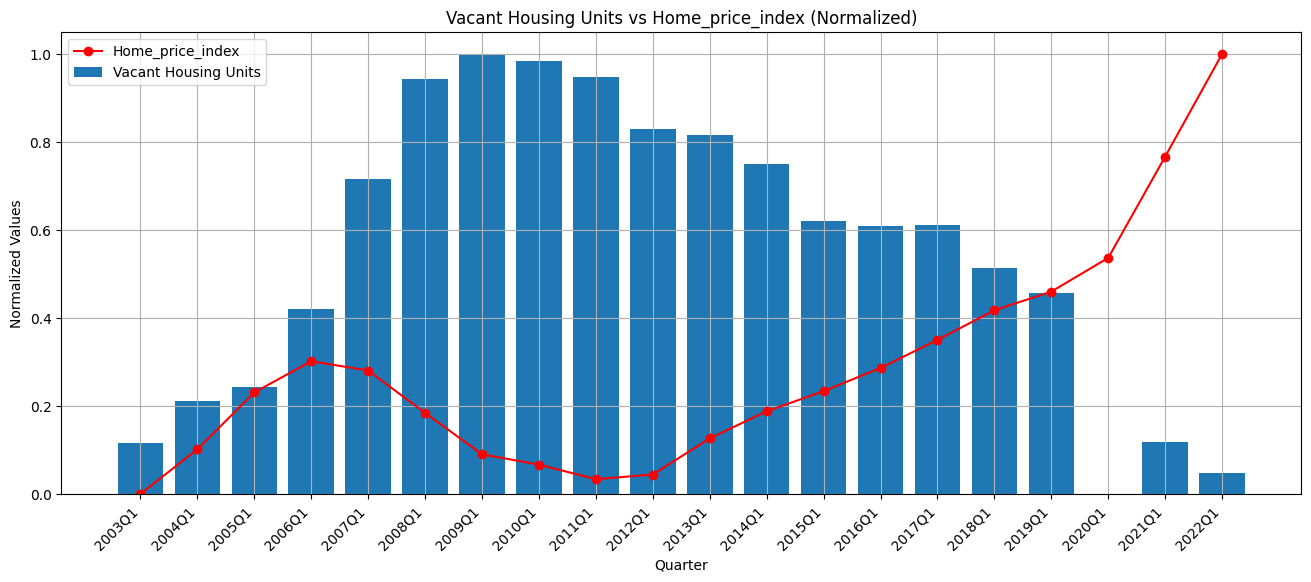

In [15]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum and the average for each quarter
grouped_data = df.groupby('QUARTER').agg({'Housing_inventory': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['Housing_inventory', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Housing_inventory', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

plt.bar(grouped_data['QUARTER'], grouped_data['Housing_inventory'], label='Vacant Housing Units')
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='r', label='Home_price_index')

plt.title('Vacant Housing Units vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right')  
plt.show()

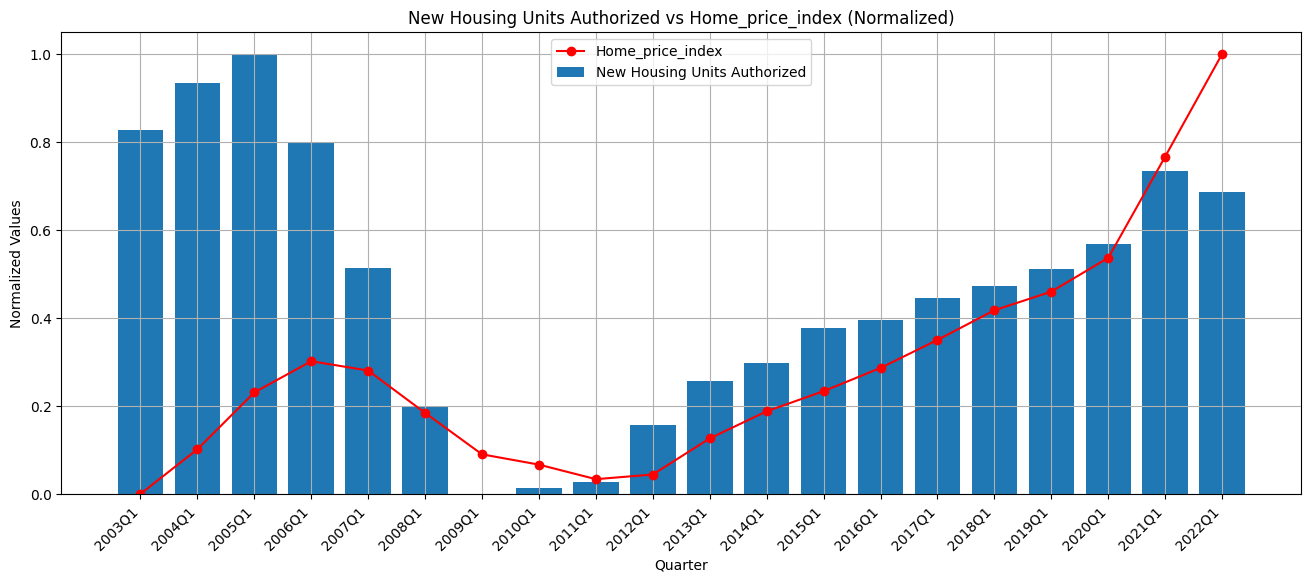

In [16]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  

grouped_data = df.groupby('QUARTER').agg({'Permit': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['Permit', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Permit', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

plt.bar(grouped_data['QUARTER'], grouped_data['Permit'], label='New Housing Units Authorized')
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='r', label='Home_price_index')

plt.title('New Housing Units Authorized vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  
plt.xticks(rotation=45, ha='right')  

plt.show()

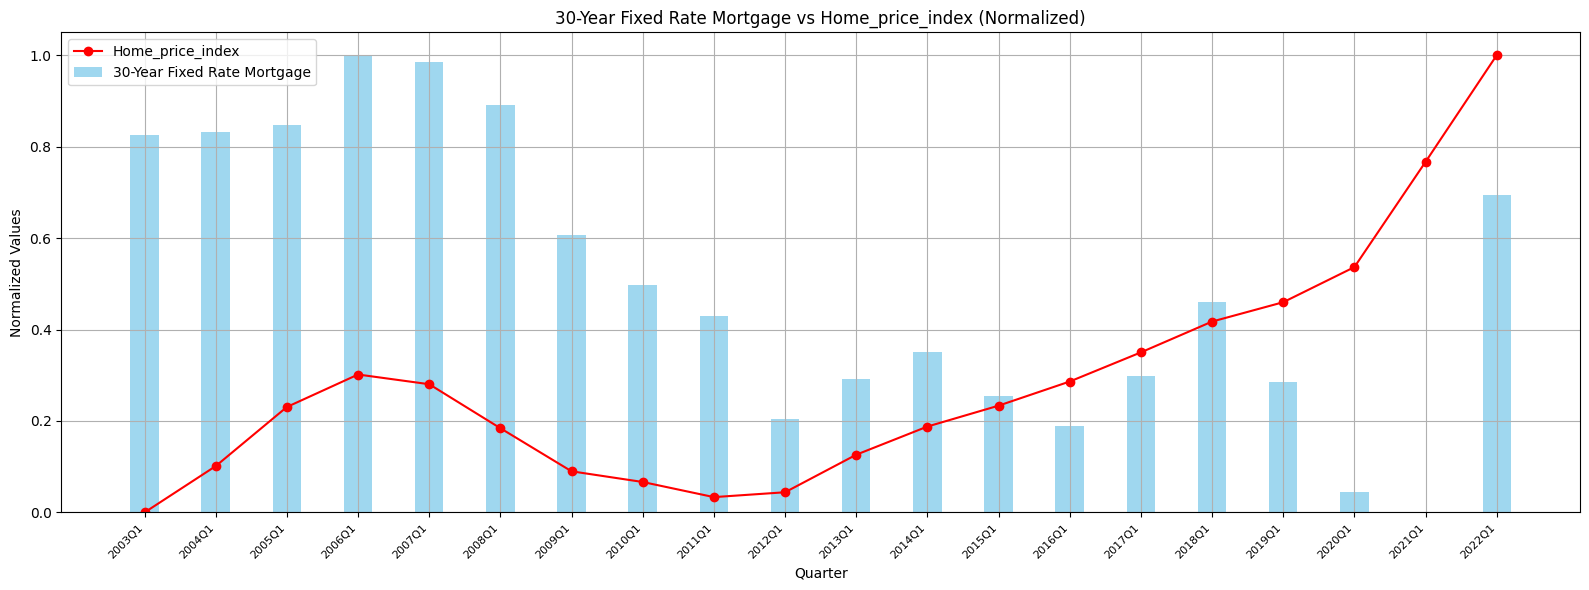

In [17]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  

grouped_data = df.groupby('QUARTER').agg({'30y_mortgage': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['30y_mortgage', 'Home_price_index']] = scaler.fit_transform(grouped_data[['30y_mortgage', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8

# Bar chart 
plt.bar(grouped_data['QUARTER'], grouped_data['30y_mortgage'], width=bar_width, alpha=opacity, color='skyblue', label='30-Year Fixed Rate Mortgage')

# Line plot 
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('30-Year Fixed Rate Mortgage vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.tight_layout()  
plt.show()

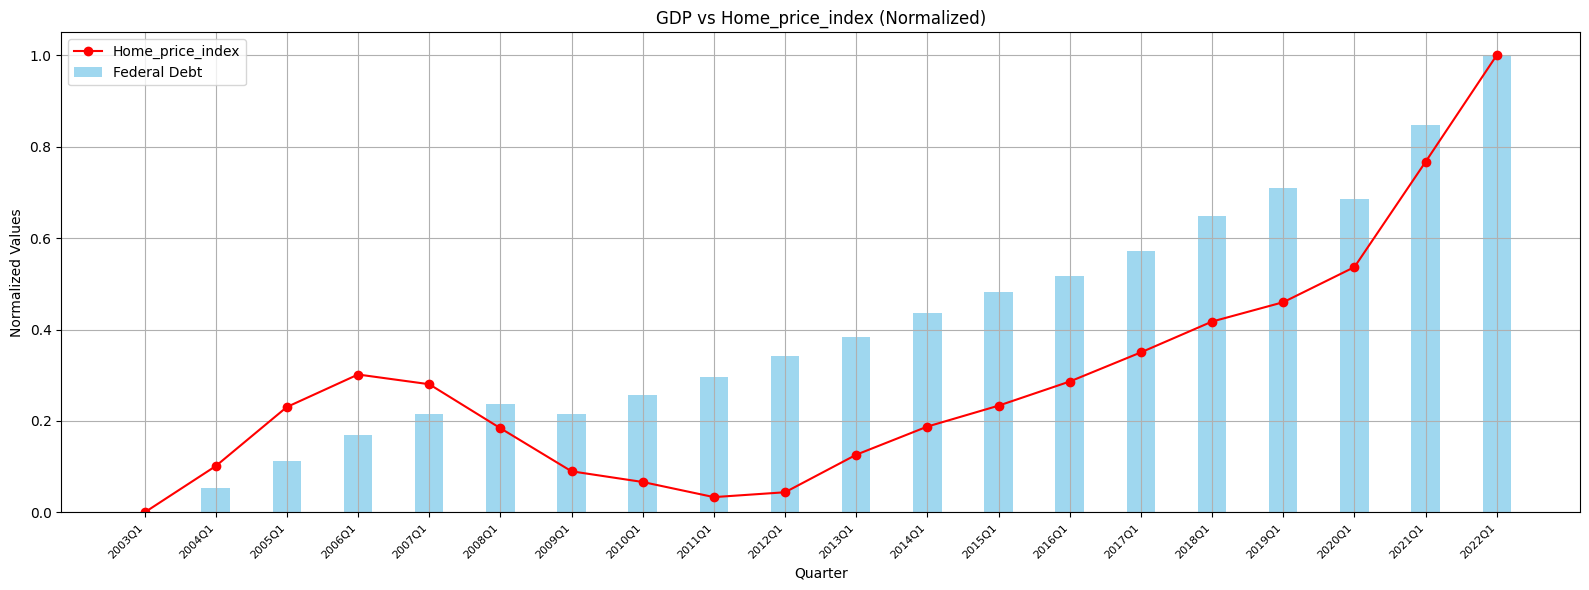

In [18]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str) 

grouped_data = df.groupby('QUARTER').agg({'GDP': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['GDP', 'Home_price_index']] = scaler.fit_transform(grouped_data[['GDP', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8

# Bar chart 
plt.bar(grouped_data['QUARTER'], grouped_data['GDP'], width=bar_width, alpha=opacity, color='skyblue', label='Federal Debt')

# Line plot 
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('GDP vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.tight_layout()  
plt.show()

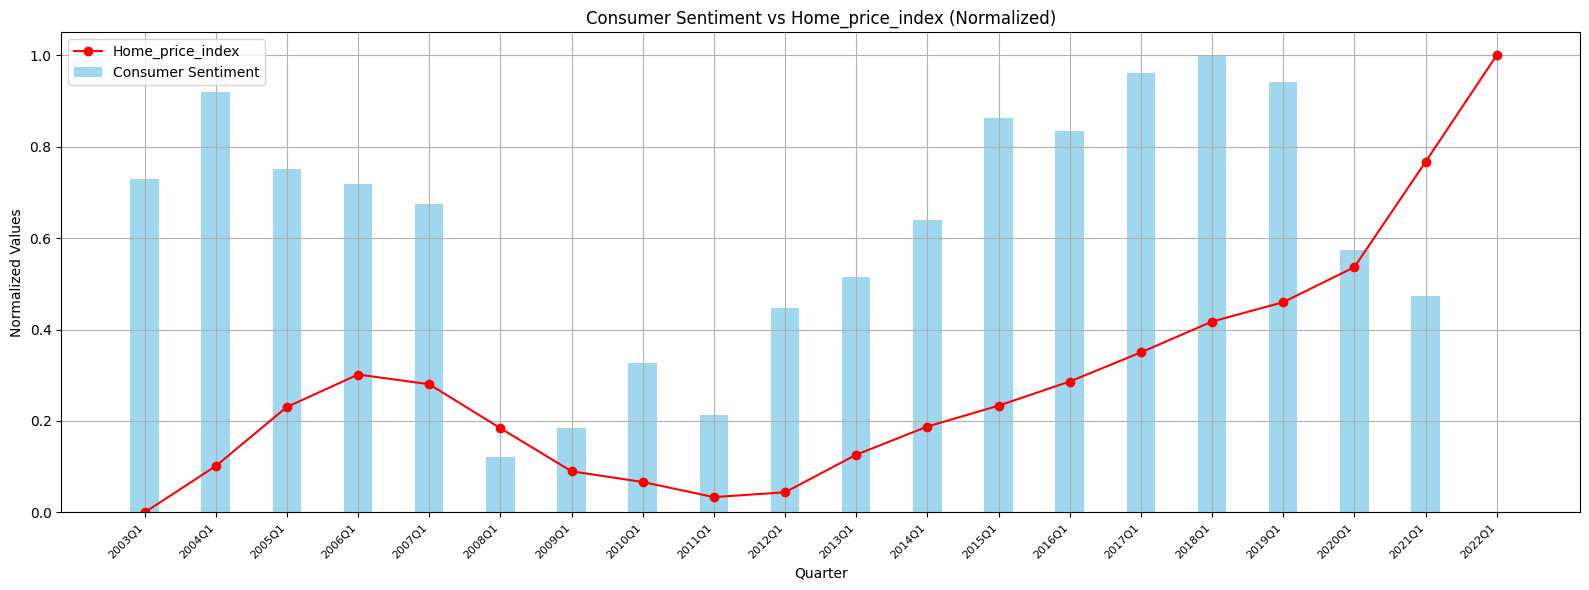

In [19]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  

grouped_data = df.groupby('QUARTER').agg({'Consumer_sentiment': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['Consumer_sentiment', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Consumer_sentiment', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8

# Bar chart 
plt.bar(grouped_data['QUARTER'], grouped_data['Consumer_sentiment'], width=bar_width, alpha=opacity, color='skyblue', label='Consumer Sentiment')

# Line plot 
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Consumer Sentiment vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.tight_layout()  
plt.show()

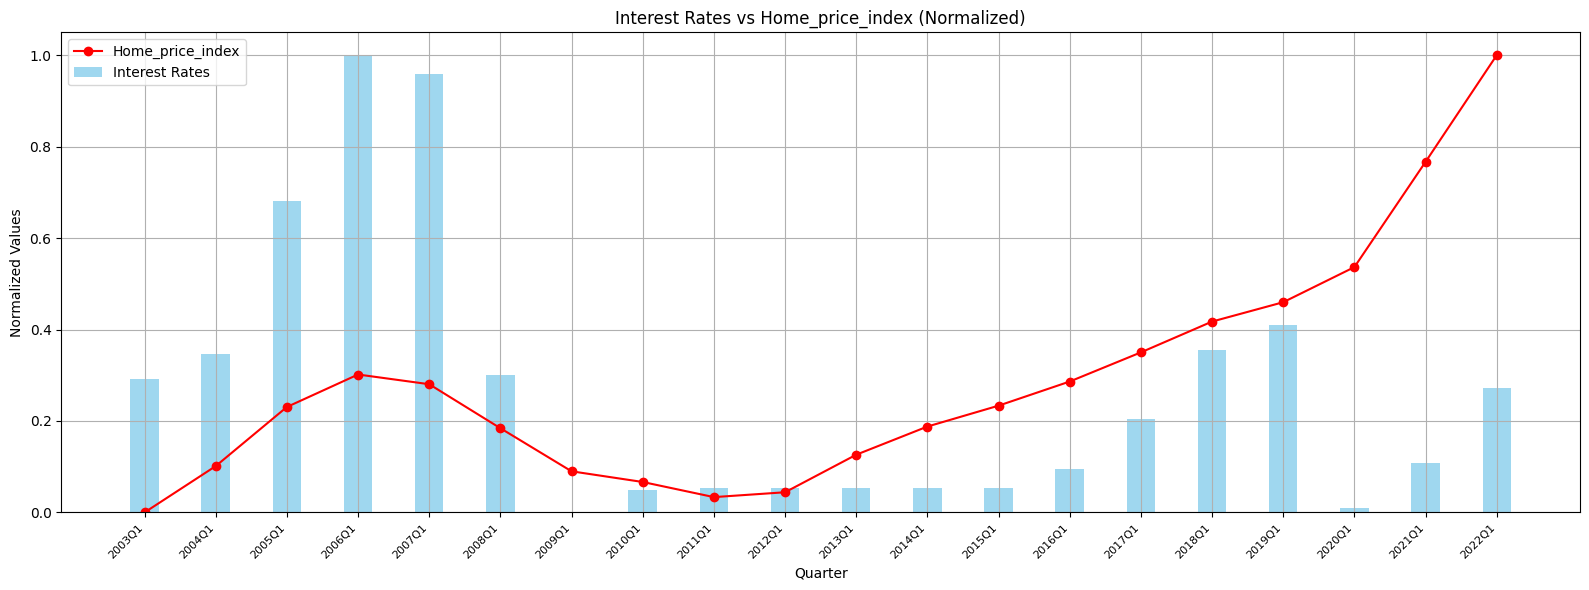

In [20]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  

grouped_data = df.groupby('QUARTER').agg({'Interest_rates': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['Interest_rates', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Interest_rates', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8

# Bar chart 
plt.bar(grouped_data['QUARTER'], grouped_data['Interest_rates'], width=bar_width, alpha=opacity, color='skyblue', label='Interest Rates')

# Line plot 
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Interest Rates vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.tight_layout() 
plt.show()

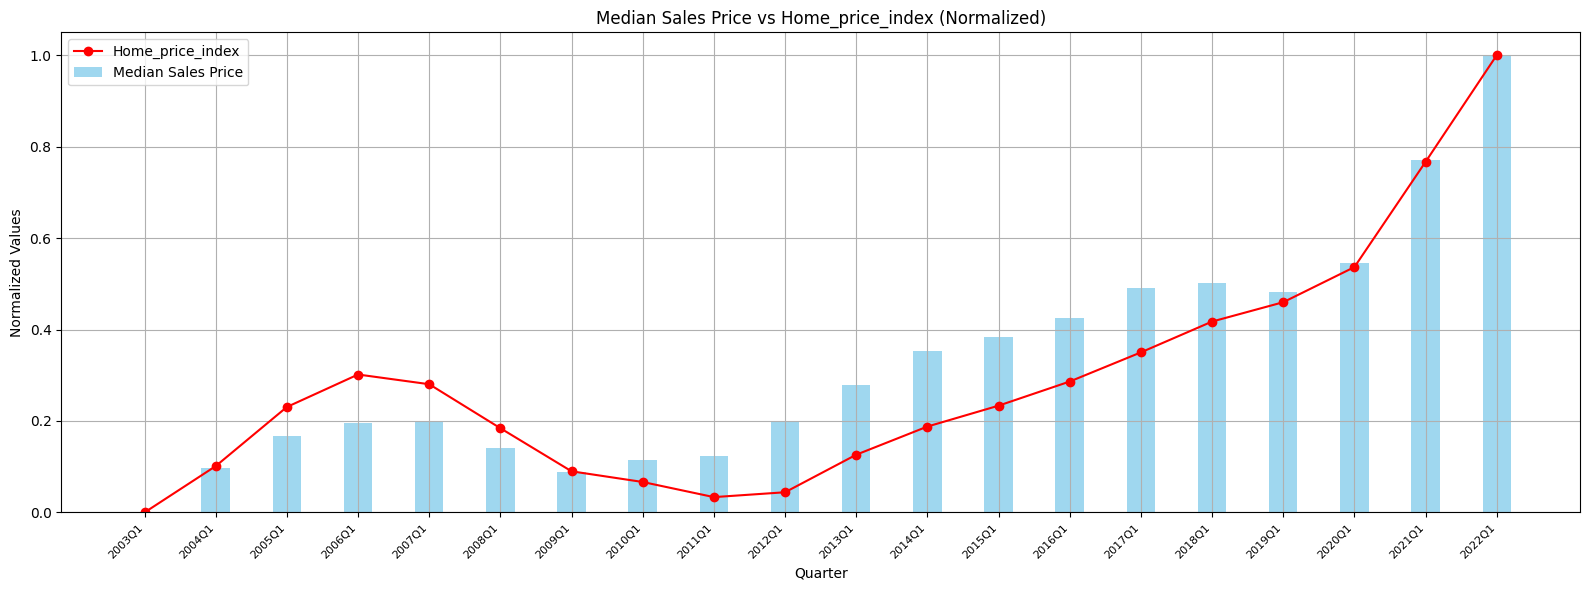

In [21]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  

grouped_data = df.groupby('QUARTER').agg({'Median_sales_price': 'sum', 'Home_price_index': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['Median_sales_price', 'Home_price_index']] = scaler.fit_transform(grouped_data[['Median_sales_price', 'Home_price_index']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  

bar_width = 0.4
opacity = 0.8

# Bar chart 
plt.bar(grouped_data['QUARTER'], grouped_data['Median_sales_price'], width=bar_width, alpha=opacity, color='skyblue', label='Median Sales Price')

# Line plot 
plt.plot(grouped_data['QUARTER'], grouped_data['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Median Sales Price vs Home_price_index (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.tight_layout()  
plt.show()

Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
features = ['Monthly_supply','Permit','Total_construction spending'\
                  ,'Housing_inventory','30y_mortgage','GDP','Consumer_sentiment','Interest_rates'\
                  ,'Median_sales_price']
target = 'Home_price_index'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse


best_model = min(results, key=results.get)
best_model_instance = models[best_model]


best_model_instance.fit(X_train, y_train)


predictions = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, predictions)


print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")

print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

Model Selection Results:
Linear Regression: MSE=13.24565907675906
Decision Tree: MSE=84.36051282051281
Random Forest: MSE=40.51500164999989
Support Vector Regression: MSE=1568.607102649409
Neural Network: MSE=306994387.6325553

Best Model: Linear Regression
Best Model MSE on Testing Set: 12.17503081583891


c:\Users\Nii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print("R-squared score:", r2)

R-squared score: 0.9852626591071091


In [25]:
best_model_instance.fit(X_train, y_train)

coefficients = best_model_instance.coef_


print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

Coefficients:
Monthly_supply: 2.790843410011523
Permit: -0.008889526744476855
Total_construction spending: 0.00014682941930456266
Housing_inventory: -0.002045458841828367
30y_mortgage: -2.0452629275268293
GDP: 0.00415854420159388
Consumer_sentiment: -0.29911949910977625
Interest_rates: 2.2860830396662224
Median_sales_price: 4.6303408431497967e-05


Model Evaluation:
-To evaluate the performance of our model, we used two key metrics: mean squared error (MSE) and R-squared score. 
-The mean squared error (MSE) measures the average squared difference between the actual target values and the predicted values. 
-A lower MSE indicates better performance, as it reflects smaller prediction errors. 
-We calculated the MSE on the testing set to assess how well our model generalized to unseen data. 
-Additionally, we used the R-squared score, which measures the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. The R-squared score helps us understand how well the independent variables (features) explain the variation in the dependent variable (target). 
-Based on our evaluation, the Linear Regression model performed well. The MSE on the testing set was 13.24, indicating relatively low prediction errors. Furthermore, the R-squared score was 0.9852, suggesting that approximately 98.52% of the variation in the target variable can be explained by the model. Analysing the coefficients of the Linear Regression model provides insights into the importance and impact of each feature on the predicted target variable. 

Here are some key observations (Due to scaling issues some factors are showing opposite coefficients i.e.. Positive/ Negative):

• 'PERMIT' (number of new housing units authorized) had a small positive coefficient of 0.0088, suggesting a weak positive relationship between the number of authorized housing units and the predicted home price index.

• 'MSACSR' (monthly supply of new houses) had a positive coefficient of 2.79, indicating that an increase in the monthly supply of new houses is associated with a higher predicted home price index.

• 'TLRESCONS' (total construction spending on residential projects) had a positive coefficient of 0.00145, implying a minimal impact on the predicted home price index.

• 'EVACANTUSQ176N' (estimate of vacant housing units) had a negative coefficient of -0.0020, indicating that an increase in the estimated number of vacant housing units is associated with a slightly lower predicted home price index.

• 'MORTGAGE30US' (average interest rate for a 30-year fixed-rate mortgage) had a negative coefficient of -2.994, suggesting that higher mortgage interest rates are associated with a lower predicted home price index.

• 'GDP' (Gross Domestic Product) had a very small positive coefficient of 0.00415, suggesting that higher GPD are associated with a higher predicted home price index.

• 'UMCSENT' (consumer sentiment index) had a negative coefficient of -0.2991, implying that lower consumer sentiment is associated with a lower predicted home price index.

• 'INTDSRUSM193N' (interest rates or discount rates) had a positive coefficient of 2.286, suggesting that higher interest or discount rates are associated with a higher predicted home price index.

• 'MSPUS' (median sales price of houses sold) had a positive coefficient of 4.630, indicating a positive relationship between the median sales price and the predicted home price index.

Conclusion:
Based on the correlation analysis and the coefficients from the Linear Regression model, several key insights can be derived:

• Supply factors, such as house inventory and the number of authorized housing units, have a positive influence on home prices. Higher construction spending on residential projects also contributes significantly to higher home prices.

• Demand factor, such as mortgage interest rates, have a negative impact on home prices. Higher mortgage rates and lower consumer sentiment are associated with slightly lower home prices.

• Economic factors, including GDP and interest rates, play a crucial role in determining home prices. A strong economy with higher GDP and slightly lower interest rates tends to support higher home prices.

• The median sales price of houses sold is strongly correlated with home prices, reflecting the importance of market dynamics and buyer behaviour in determining home price movements.

These insights can be valuable for various stakeholders in the real estate market, including home buyers, sellers, developers, and policymakers. Understanding the factors that influence home prices can help make informed decisions related to investments, financing, and economic policies.